<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Build_a_neural_network_to_find_malaria_in_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data via Tensorflow

In [1]:
#import necessary librairies
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy

In [2]:
#load malaria dataset
malaria, info = tfds.load(name = "malaria",
          split = "train",
          with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/malaria/1.0.0.incompleteMQ2426/malaria-train.tfrecord*...:   0%|          | 0/…

Dataset malaria downloaded and prepared to ~/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
malaria

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [4]:
info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images
    with equal instances of parasitized and uninfected cells from the thin blood
    smear slide images of segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='~/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear

In [5]:
#shuffle dataset
malaria = malaria.shuffle(2000).prefetch(tf.data.experimental.AUTOTUNE)

malaria

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

Visualize malaria cell images

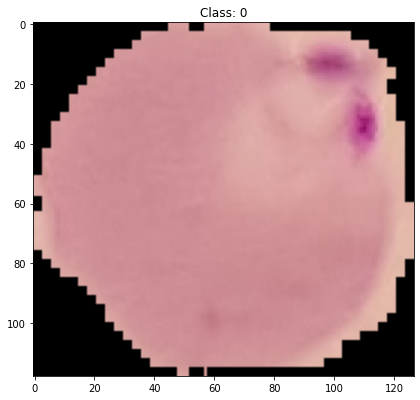

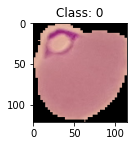

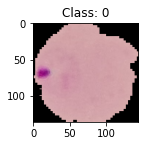

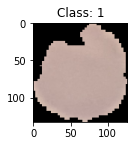

In [6]:
#plot some images from the dataset
plt.figure(figsize = (15, 15))

num_of_images = 4

for index, feature in enumerate(malaria.take(num_of_images)):
  image = feature["image"].numpy()

  label = feature["label"].numpy()

  plt.subplot(2,2, index + 1)

  plt.title("Class: " + str(label))

  plt.imshow(image)

  plt.show()

Extract a subset of samples

In [7]:
#create training and testign datasets
dataset_length = 8000
new_size = 133
training_dataset_length = 0.8
X = int(dataset_length * training_dataset_length)
colors = 3
training_images = numpy.zeros((X, new_size, new_size, colors))
training_labels = numpy.zeros(X)
y = dataset_length - X
testing_images = numpy.zeros((y, new_size, new_size, colors))
testing_labels = numpy.zeros(y)

for index, cell in enumerate(malaria.take(dataset_length)):

  image = tf.image.resize(cell["image"],
                          size = [new_size, new_size]).numpy()
  
  label = cell["label"].numpy()

  if index < X:
    training_images[index] = image

    training_labels[index] = label

  else:
    testing_images[index - X] = image

    testing_labels[index - X] = label

In [8]:
training_images.shape

(6400, 133, 133, 3)

In [9]:
training_labels.shape

(6400,)

In [10]:
testing_images.shape

(1600, 133, 133, 3)

In [11]:
testing_labels.shape

(1600,)

Build a neural network

In [17]:
#create each layer of the model
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape = (new_size, new_size, colors)))

model.add(keras.layers.Dense(200, activation = "relu"))

model.add(keras.layers.Dense(150, activation = "relu"))

model.add(keras.layers.Dense(8))

optimizer = tf.keras.optimizers.Adam()

loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

metrics = ["accuracy"]

model.compile(optimizer = optimizer,
              loss = loss_function,
              metrics = metrics)

Train and evaluate model

In [18]:
#train model
number_of_training_loops = 8

model.fit(training_images, training_labels, epochs = number_of_training_loops)

Epoch 1/8
200/200 [==============================] - 2s 6ms/step - loss: 833.4197 - accuracy: 0.5472
Epoch 2/8
200/200 [==============================] - 1s 6ms/step - loss: 271.6758 - accuracy: 0.5600
Epoch 3/8
200/200 [==============================] - 1s 6ms/step - loss: 37.9919 - accuracy: 0.6231
Epoch 4/8
200/200 [==============================] - 1s 6ms/step - loss: 49.6692 - accuracy: 0.5730
Epoch 5/8
200/200 [==============================] - 1s 6ms/step - loss: 11.0197 - accuracy: 0.6119
Epoch 6/8
200/200 [==============================] - 1s 6ms/step - loss: 9.0144 - accuracy: 0.5994
Epoch 7/8
200/200 [==============================] - 1s 6ms/step - loss: 17.8888 - accuracy: 0.5806
Epoch 8/8
200/200 [==============================] - 1s 6ms/step - loss: 8.0534 - accuracy: 0.5723


In [19]:
#evaluate model
testing_loss, testing_accuracy = model.evaluate(testing_images, testing_labels, verbose = 2)

50/50 - 0s - loss: 1.3481 - accuracy: 0.4894 - 332ms/epoch - 7ms/step
